## RSSA file

```{eval-rst}
The complete API can be found at :py:class:`f4enix.output.rssa.RSSA`
```

MCNP allows to record particles crossing a surface during a
Monte Carlo simulation in order to use them as a source in
a subsequent analyses. These particle tracks are stored in
a file called RSSA.

### Loading and analyzing a RSSA file

The binary reader of this tool is very fast as it has been vectorized via Numpy. Reading a RSSA file of 6 Gb with the PyNE reader takes around 15 minutes while this reader does the same in 10 seconds. Lets start by loading a new RSSA file.

In [1]:
from matplotlib import pyplot as plt

from f4enix.output.rssa import RSSA, PlotParameters

# The class is initialized by providing the path to the file
my_rssa = RSSA("small_cyl.w")
my_rssa  # printing shows relevant information

RSSA file small_cyl.w was recorded using the following surfaces:
  Surface ID: 1, type: 1
The total number of tracks recorded is 72083.
Neutrons: 72083 photons: 0, The simulation that produced this RSSA run 100000 histories.
The amount of independent histories that reached the RSSA surfaces was 70797.

In [2]:
my_rssa.tracks  # This is an array containing all the infomation of all the tracks
my_rssa.x  # With this command we acces a vector holding the X position of every track
my_rssa.y  
my_rssa.z  # Same for Y and Z coordinates and the Weight values of the tracks
my_rssa.wgt
my_rssa.energies
my_rssa.histories  # History number of the tracks

# Lets print some information of the 1234 track recorded in the RSSA file
index = 1234
position = (my_rssa.x[index], my_rssa.y[index], my_rssa.z[index])
print(f'The track with index {index} was recorded at position:\n{position}')
print(f'The track had an energy of {my_rssa.energies[index]} MeV and weight of {my_rssa.wgt[index]}')
print(f'The track was originated at the history number {my_rssa.histories[index]}')

The track with index 1234 was recorded at position:
(-0.13126632308094988, 29.99971281783252, 12.254586722666627)
The track had an energy of 14.0 MeV and weight of 1.0
The track was originated at the history number -1739


The RSSA file may contain both neutrons and photons. The tool has a way to easily dicriminate between particle types with the use of filters, also called masks.

### Plot cylindrical surfaces

The level of customization possible with these type of plots is quite high.

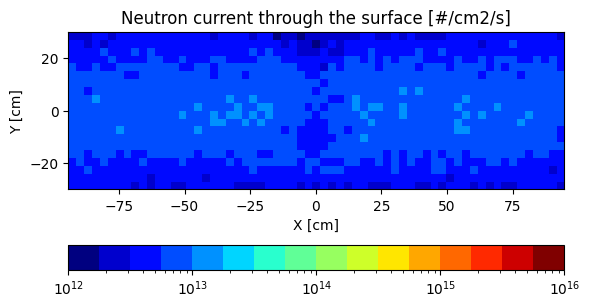

In [3]:
# Plot the neutron current
(
    my_rssa.plot_cyl()
    .set_particle("n")  # Only neutrons will be plotted
    # .set_surface_ids([1])  # We can use many functions to customize the plot
    .set_z_limits(-600, 800)
    .set_perimeter_limits(-500, 1000)
    .calculate_bins(bin_width=3)  # Set the width of the bins to 3 cm
    .get_particle_current(1e17)  # Make the plot for current with 1e17 n/s
    .set_plot_parameters(
        PlotParameters(
            vmin=1e12,
            vmax=1e16,
            number_of_colors=16,
            legend_orientation="horizontal",
            title="Neutron current through the surface [#/cm2/s]",
        )
    )
    # .save_figure("bioshield_current_be_1e14.png")  # Save the figure to a file
    .show()  # Simply show the figure to a window instead of saving it
)

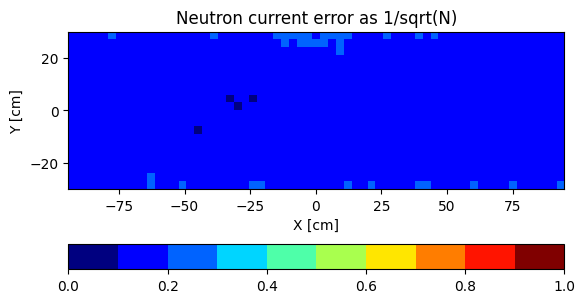

In [4]:
# Plot the neutron current statistical errors
(
    my_rssa.plot_cyl()
    .set_particle("n")  # Only neutrons will be plotted
    # .set_surface_ids([1])  # We can use many functions to customize the plot
    .set_z_limits(-600, 800)
    .set_perimeter_limits(-500, 1000)
    .calculate_bins(bin_width=3)  # Set the width of the bins to 3 cm
    .get_particle_current_errors()
    .set_plot_parameters(
        PlotParameters(
            vmin=0,
            vmax=1,
            number_of_colors=10,
            norm="linear",
            legend_orientation="horizontal",
            title="Neutron current error as 1/sqrt(N)",
        )
    )
    # .save_figure("bioshield_current_be_1e14.png")  # Save the figure to a file
    .show()  # Simply show the figure to a window instead of saving it
)

But if it was not sufficient it is possible to act on the matplotlib figures
directly:

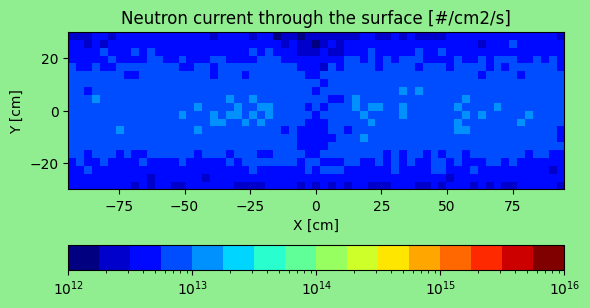

In [5]:
fig, ax = (
    my_rssa.plot_cyl()
    .set_particle("n")  # Only neutrons will be plotted
    # .set_surface_ids([1])  # We can use many functions to customize the plot
    .set_z_limits(-600, 800)
    .set_perimeter_limits(-500, 1000)
    .calculate_bins(bin_width=3)  # Set the width of the bins to 3 cm
    .get_particle_current(1e17)  # Make the plot for current with 1e17 n/s
    .set_plot_parameters(
        PlotParameters(
            vmin=1e12,
            vmax=1e16,
            number_of_colors=16,
            legend_orientation="horizontal",
            title="Neutron current through the surface [#/cm2/s]",
        )
    )
    # .save_figure("bioshield_current_be_1e14.png")  # Save the figure to a file
    .get_plot()
)
fig.patch.set_facecolor("lightgreen")  # Set the figure background color
plt.show()
